In [ ]:
#Install Necessary Libraries:

In [2]:
!pip install textblob
!pip install pycountry
!pip install langdetect
!pip install pandas numpy re nltk

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [3]:
# Import Libraries

In [4]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import time
import seaborn as sns
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [5]:
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
#Load the Scraped Data:

In [6]:
df = pd.read_excel('combined_data.xlsx')

In [12]:
df

,username,text,likes,timestamp,tweet_hashtags/0
0,@MichaelDaGaymer,I bought myself an SD card for my Nintendo Wii...,3,2023-08-31 22:34:00+00:00,#Amazon
1,@TheQueerNotion,THIS WEEK on the #queer Notion: Furiously lick...,1,2023-08-31 21:29:00+00:00,#queer
2,@TrevorLeWoof,"PLEASE have a look at our designs , lgbttees.c...",2,2023-08-31 21:22:00+00:00,#lgbt
3,@KevinandTrevor,"PLEASE have a look at our designs , lgbttees.c...",9,2023-08-31 21:22:00+00:00,#lgbt
4,@UUOttawa,Bless all of us #queer and lesbian and gay and...,2,2023-08-31 20:48:00+00:00,#queer
...,...,...,...,...,...
983,@MassLeague,"Congratulations to Maria Coppenrath, Chief Fin...",8,2023-08-30 01:12:00+00:00,#pride
984,@BrandNewWine,People S*ck At Playing God!! #jesus #god #bibl...,0,2023-08-30 01:02:00+00:00,#jesus
985,@Bennnnnnnwasta1,Love wins! \nAlso I know it’s a yard sign but ...,1,2023-08-30 00:40:00+00:00,#pride
986,@SteveMc96007305,Norm Macdonald On Gay Pride @lgbtqnation #norm...,0,2023-08-30 00:11:00+00:00,#normmacdonald


In [13]:
#Data Cleaning:

In [14]:
#Remove HTML Tags and Links:

In [22]:
df['text'] = df['text'].apply(lambda x: re.sub(r'<.*?>|http\S+', '', x))


In [23]:
#Remove Special Characters and Punctuation:

In [24]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


In [25]:
#Lowercase Text:

In [26]:
df['text'] = df['text'].str.lower()


In [12]:
#Tokenize the text and remove stop words using NLTK:

In [27]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

df['text'] = df['text'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
#Remove Empty Rows:

In [28]:
df = df[df['text'].str.strip() != '']


In [29]:
#Save Cleaned Data:

In [30]:
df.to_csv('cleaned_tweets.csv', index=False)


In [31]:
def label_sentiment(tweet):
    analysis = TextBlob(tweet)
    sentiment = analysis.sentiment

    if sentiment.polarity > 0:
        return "positive"
    elif sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis to each tweet and create a new 'sentiment' column
df['sentiment'] = df['text'].apply(label_sentiment)


In [32]:
# Save the labeled DataFrame to a new CSV file
df.to_csv('labeled_tweets.csv', index=False)


In [33]:

# Load your data into a DataFrame
df = pd.read_csv('labeled_tweets.csv')  # Replace with your data file

# Use value_counts to count tweets in each category
sentiment_counts = df['sentiment'].value_counts()

# Display the counts
print(sentiment_counts)


positive    526
neutral     319
negative    143
Name: sentiment, dtype: int64


In [34]:
#Calculating Negative, Positive, Neutral and Compound values
df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  if neg > pos:
    df.loc[index, 'sentiment'] = 'negative'
  
  elif pos > neg:
    df.loc[index, 'sentiment'] = 'positive'
  
  else:
    df.loc[index, 'sentiment'] = 'neutral'
    
  df.loc[index, 'neg'] = neg
  df.loc[index, 'neu'] = neu
  df.loc[index, 'pos'] = pos
  
 
df.head(10)

,username,text,likes,timestamp,tweet_hashtags/0,sentiment,polarity,subjectivity,neg,neu,pos
0,@MichaelDaGaymer,bought sd card nintendo wii amazon came mail t...,3,2023-08-31 22:34:00+00:00,#Amazon,positive,0.416667,0.583333,0.000,0.823,0.177
1,@TheQueerNotion,week queer notion furiously licking sandpaper ...,1,2023-08-31 21:29:00+00:00,#queer,negative,0.000000,0.066667,0.132,0.868,0.000
2,@TrevorLeWoof,please look designs lgbtteescreatorspringcom l...,2,2023-08-31 21:22:00+00:00,#lgbt,positive,0.372222,0.427778,0.000,0.689,0.311
3,@KevinandTrevor,please look designs lgbtteescreatorspringcom l...,9,2023-08-31 21:22:00+00:00,#lgbt,positive,0.372222,0.427778,0.000,0.689,0.311
4,@UUOttawa,bless us queer lesbian gay trans bi nonbinary ...,2,2023-08-31 20:48:00+00:00,#queer,positive,0.208333,0.358333,0.068,0.741,0.191
5,@Foxybelleafriq,thursday get ready raise spirits eyebrows thur...,1,2023-08-31 20:41:00+00:00,#drag,negative,-0.150000,0.360417,0.202,0.723,0.075
6,@KellyFarmerAuth,adding really want chat queer joy happiness po...,1,2023-08-31 20:30:00+00:00,#queer,positive,0.566667,0.200000,0.000,0.471,0.529
7,@edmonton_eulers,hes another random nhl twitter guy know bc lik...,1,2023-08-31 20:26:00+00:00,#queer,positive,-0.500000,0.500000,0.000,0.811,0.189
8,@Dr_ADJ_Gonzalez,im elated serve developing editor jqtsie amazi...,67,2023-08-31 20:26:00+00:00,#queer,positive,0.600000,0.900000,0.000,0.494,0.506
9,@NationalNOW,stats video australia message universal dragqu...,20,2023-08-31 20:17:00+00:00,#DragQueen,positive,0.050000,0.000000,0.000,0.872,0.128


In [35]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(df,'sentiment')

,Total,Percentage
positive,731,73.99
negative,166,16.80
neutral,91,9.21


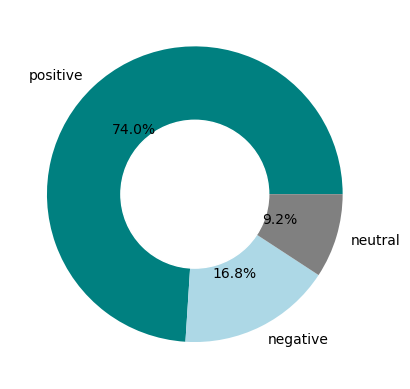

In [37]:
# create data for Pie Chart
piechart = count_values_in_column(df,'sentiment')
names= piechart.index
size=piechart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size,autopct='%1.1f%%',labels=names, colors=['teal','lightblue','grey'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [38]:
#Function to Create Wordcloud
def create_wordcloud(text, pol):
#  mask = np.array(Image.open('cloud.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='white',
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 text_query='pride'
 wc.to_file(text_query + '_' + pol + '_'+'wc.png')
 print('Word Cloud Saved Successfully')
 path= text_query + '_' + pol + '_'+'wc.png'
 display(Image.open(path))

In [41]:
#Creating new data frames for all sentiments (positive, negative and neutral)
df_negative = df[df['sentiment']=='negative']
df_positive = df[df['sentiment']=='positive']
df_neutral = df[df['sentiment']=='neutral']

Word Cloud Saved Successfully


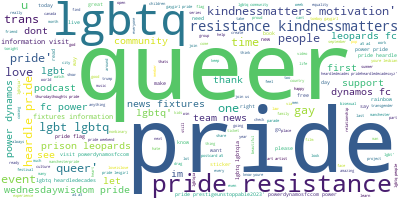

In [42]:
#Creating wordcloud for all tweets
create_wordcloud(df['text'].values, 'all')

Word Cloud Saved Successfully


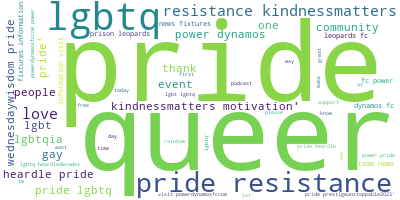

In [43]:
#Creating wordcloud for positive sentiment
create_wordcloud(df_positive['text'].values, 'positive')

Word Cloud Saved Successfully


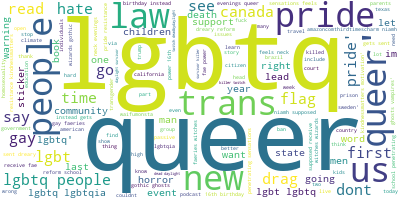

In [44]:
#Creating wordcloud for negative sentiment
create_wordcloud(df_negative['text'].values, 'negative')

In [40]:
#Calculating tweet’s lenght and word count
df['text_len'] = df['text'].astype(str).apply(len)
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,166.18
neutral,111.73
positive,148.15


In [45]:
round(pd.DataFrame(df.groupby('sentiment').text_word_count.mean()),2)

AttributeError: 'DataFrameGroupBy' object has no attribute 'text_word_count'

In [46]:
#Removing Punctuation
def remove_punct(text):
 text = ''.join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
df['punct'] = df['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df.head()

,username,text,likes,timestamp,tweet_hashtags/0,sentiment,polarity,subjectivity,neg,neu,pos,punct,tokenized,nonstop,stemmed
0,@MichaelDaGaymer,bought sd card nintendo wii amazon came mail t...,3,2023-08-31 22:34:00+00:00,#Amazon,positive,0.416667,0.583333,0.000,0.823,0.177,bought sd card nintendo wii amazon came mail t...,"[bought, sd, card, nintendo, wii, amazon, came...","[bought, sd, card, nintendo, wii, amazon, came...","[bought, sd, card, nintendo, wii, amazon, came..."
1,@TheQueerNotion,week queer notion furiously licking sandpaper ...,1,2023-08-31 21:29:00+00:00,#queer,negative,0.000000,0.066667,0.132,0.868,0.000,week queer notion furiously licking sandpaper ...,"[week, queer, notion, furiously, licking, sand...","[week, queer, notion, furiously, licking, sand...","[week, queer, notion, furious, lick, sandpap, ..."
2,@TrevorLeWoof,please look designs lgbtteescreatorspringcom l...,2,2023-08-31 21:22:00+00:00,#lgbt,positive,0.372222,0.427778,0.000,0.689,0.311,please look designs lgbtteescreatorspringcom l...,"[please, look, designs, lgbtteescreatorspringc...","[please, look, designs, lgbtteescreatorspringc...","[pleas, look, design, lgbtteescreatorspringcom..."
3,@KevinandTrevor,please look designs lgbtteescreatorspringcom l...,9,2023-08-31 21:22:00+00:00,#lgbt,positive,0.372222,0.427778,0.000,0.689,0.311,please look designs lgbtteescreatorspringcom l...,"[please, look, designs, lgbtteescreatorspringc...","[please, look, designs, lgbtteescreatorspringc...","[pleas, look, design, lgbtteescreatorspringcom..."
4,@UUOttawa,bless us queer lesbian gay trans bi nonbinary ...,2,2023-08-31 20:48:00+00:00,#queer,positive,0.208333,0.358333,0.068,0.741,0.191,bless us queer lesbian gay trans bi nonbinary ...,"[bless, us, queer, lesbian, gay, trans, bi, no...","[bless, us, queer, lesbian, gay, trans, bi, no...","[bless, us, queer, lesbian, gay, tran, bi, non..."


In [47]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['text'])
print('{} Number of tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
# 1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())
count_vect_df.head()

988 Number of tweets have 5583 words


,,aaaaaa,aali,aaron,aashnauk,abbey,abbrevi,abet,abil,abl,...,zanupf,zazzlecomrainbowstripesg,zeitgeisthair,zerbi,zimbabw,zine,zoom,zoopggcwebelong,zulu,zygot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
lgbtq,395
queer,381
lgbt,132
lgbtqia,101
power,84
gay,79
love,79
resist,70
motiv,69
kindnessmatt,68


In [49]:
# Save the final DataFrame to a new CSV file
df.to_csv('sentimental_final.csv', index=False)


In [50]:
#Creating a predictive machine learning model for sentiment analysis

In [51]:
#Data Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=450, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['sentiment']


In [52]:
#Split Data into Training and Testing Sets:

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
#Select a Machine Learning Algorithm:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



nb_model = MultinomialNB()
svm_model = SVC(kernel='linear') 
logistic_regression_model = LogisticRegression()

In [55]:
#Train the Models:
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [56]:
#Evaluate the Model:
#Naive bayes model
from sklearn.metrics import classification_report, accuracy_score

y_pred1 = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


Accuracy: 0.7171717171717171
              precision    recall  f1-score   support

    negative       0.75      0.07      0.14        40
     neutral       0.33      0.05      0.09        20
    positive       0.72      1.00      0.84       138

    accuracy                           0.72       198
   macro avg       0.60      0.38      0.35       198
weighted avg       0.69      0.72      0.62       198



In [57]:
#svm model
y_pred2 = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.7373737373737373
              precision    recall  f1-score   support

    negative       0.56      0.12      0.20        40
     neutral       0.62      0.25      0.36        20
    positive       0.75      0.99      0.85       138

    accuracy                           0.74       198
   macro avg       0.64      0.45      0.47       198
weighted avg       0.70      0.74      0.67       198



In [58]:
#logistic regression model
y_pred3 = logistic_regression_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

Accuracy: 0.7424242424242424
              precision    recall  f1-score   support

    negative       0.62      0.12      0.21        40
     neutral       0.71      0.25      0.37        20
    positive       0.75      0.99      0.85       138

    accuracy                           0.74       198
   macro avg       0.70      0.46      0.48       198
weighted avg       0.72      0.74      0.67       198



In [55]:
#PREDICTION

In [59]:
#preprocessing new_data
new_data= pd.read_excel('test_data.xlsx')
new_data['text'] = new_data['text'].apply(lambda x: re.sub(r'<.*?>|http\S+', '', x))
new_data['text'] = new_data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
new_data['text'] = new_data['text'].str.lower()
stop_words = set(stopwords.words('english'))
new_data['text'] = new_data['text'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))

new_data= new_data[new_data['text'].str.strip() != '']
new_data.to_csv('test_cleaned.csv', index=False)
df1 = pd.read_csv('test_cleaned.csv') 
df1



,username,text,likes,timestamp,tweet_hashtags/0
0,@Kenz_DarkAngel,absolutely love picture loveislove,1,2023-08-31 22:50:00+00:00,#loveislove
1,@L_AdeleShasa,mellos mellos dayanemello breaktudoawards daya...,0,2023-08-31 22:43:00+00:00,#Mellos
2,@photoframd,canadian couple wins lawsuit italy birth photo...,1,2023-08-31 22:42:00+00:00,#photography
3,@Chelseagirl78,simple notohate grateful beautiful people surr...,7,2023-08-31 22:41:00+00:00,#NoToHate
4,@hedahunter,certainly need change thx pal disarmhate lovei...,15,2023-08-31 22:23:00+00:00,#DisarmHate
...,...,...,...,...,...
499,@staywithme24_7,fake gun fake everything dangerousromance boys...,1,2023-08-26 06:50:00+00:00,#dangerousromance
500,@sriramauthentic,discrimination lgbtq community denies individu...,0,2023-08-26 06:50:00+00:00,#LoveIsLove
501,@AmandaJaneDeano,year 13 manchester pride itv itvcorrie walking...,6,2023-08-26 05:28:00+00:00,#proudally
502,@KarateElf1,stop crying im going learn think live long lif...,0,2023-08-26 04:58:00+00:00,#loveislove


In [60]:
def label_sentiment(tweet):
    analysis = TextBlob(tweet)
    sentiment = analysis.sentiment

    if sentiment.polarity > 0:
        return "positive"
    elif sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis to each tweet and create a new 'sentiment' column
df1['sentiment'] = df1['text'].apply(label_sentiment)

df1.to_csv('labeled_test_data.csv', index=False)



In [62]:
df2 = pd.read_csv('labeled_test_data.csv') 
df2

,username,text,likes,timestamp,tweet_hashtags/0,sentiment
0,@Kenz_DarkAngel,absolutely love picture loveislove,1,2023-08-31 22:50:00+00:00,#loveislove,positive
1,@L_AdeleShasa,mellos mellos dayanemello breaktudoawards daya...,0,2023-08-31 22:43:00+00:00,#Mellos,positive
2,@photoframd,canadian couple wins lawsuit italy birth photo...,1,2023-08-31 22:42:00+00:00,#photography,positive
3,@Chelseagirl78,simple notohate grateful beautiful people surr...,7,2023-08-31 22:41:00+00:00,#NoToHate,positive
4,@hedahunter,certainly need change thx pal disarmhate lovei...,15,2023-08-31 22:23:00+00:00,#DisarmHate,positive
...,...,...,...,...,...,...
499,@staywithme24_7,fake gun fake everything dangerousromance boys...,1,2023-08-26 06:50:00+00:00,#dangerousromance,negative
500,@sriramauthentic,discrimination lgbtq community denies individu...,0,2023-08-26 06:50:00+00:00,#LoveIsLove,positive
501,@AmandaJaneDeano,year 13 manchester pride itv itvcorrie walking...,6,2023-08-26 05:28:00+00:00,#proudally,negative
502,@KarateElf1,stop crying im going learn think live long lif...,0,2023-08-26 04:58:00+00:00,#loveislove,negative


In [64]:
tfidf_vectorizer = TfidfVectorizer(max_features=450, stop_words='english')
# Fit the vectorizer on the new data
tfidf_vectorizer.fit(df1['text'])
# Transform the new data
X_new = tfidf_vectorizer.transform(df1['text'])
y_new=df2['sentiment']

# Save the trained vectorizer during model training
from joblib import dump, load

dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Load the trained vectorizer for use on new data
loaded_vectorizer = load('tfidf_vectorizer.joblib')

# Transform the new data using the loaded vectorizer
X_new = loaded_vectorizer.transform(df1['text'])




In [65]:

predictions_nb = nb_model.predict(X_new)
predictions_svm = svm_model.predict(X_new)
predictions_lr=logistic_regression_model.predict(X_new)

In [61]:

print("Accuracy of Naive Bayes' model:", accuracy_score(y_new, predictions_nb))
print(classification_report(y_new,predictions_nb))


print("Accuracy of SVM model:", accuracy_score(y_new,predictions_svm))
print(classification_report(y_new,predictions_svm))


print("Accuracy of Logistic regression model:", accuracy_score(y_new,predictions_svm))
print(classification_report(y_new,predictions_lr))

Accuracy of Naive Bayes' model: 0.4807692307692308
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.00      0.00      0.00        19
    positive       0.50      0.93      0.65        27

    accuracy                           0.48        52
   macro avg       0.17      0.31      0.22        52
weighted avg       0.26      0.48      0.34        52

Accuracy of SVM model: 0.4807692307692308
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.00      0.00      0.00        19
    positive       0.50      0.93      0.65        27

    accuracy                           0.48        52
   macro avg       0.17      0.31      0.22        52
weighted avg       0.26      0.48      0.34        52

Accuracy of Logistic regression model: 0.4807692307692308
              precision    recall  f1-score   support

    negative       0.00      0.0

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [66]:
df2['predicted_sentiment_nb'] = predictions_nb
df2['predicted_sentiment_svm'] = predictions_svm
df2['predicted_sentiment_lr'] = predictions_lr
df2

,username,text,likes,timestamp,tweet_hashtags/0,sentiment,predicted_sentiment_nb,predicted_sentiment_svm,predicted_sentiment_lr
0,@Kenz_DarkAngel,absolutely love picture loveislove,1,2023-08-31 22:50:00+00:00,#loveislove,positive,positive,positive,positive
1,@L_AdeleShasa,mellos mellos dayanemello breaktudoawards daya...,0,2023-08-31 22:43:00+00:00,#Mellos,positive,positive,positive,positive
2,@photoframd,canadian couple wins lawsuit italy birth photo...,1,2023-08-31 22:42:00+00:00,#photography,positive,positive,positive,positive
3,@Chelseagirl78,simple notohate grateful beautiful people surr...,7,2023-08-31 22:41:00+00:00,#NoToHate,positive,positive,positive,positive
4,@hedahunter,certainly need change thx pal disarmhate lovei...,15,2023-08-31 22:23:00+00:00,#DisarmHate,positive,positive,positive,positive
...,...,...,...,...,...,...,...,...,...
499,@staywithme24_7,fake gun fake everything dangerousromance boys...,1,2023-08-26 06:50:00+00:00,#dangerousromance,negative,positive,positive,positive
500,@sriramauthentic,discrimination lgbtq community denies individu...,0,2023-08-26 06:50:00+00:00,#LoveIsLove,positive,positive,positive,positive
501,@AmandaJaneDeano,year 13 manchester pride itv itvcorrie walking...,6,2023-08-26 05:28:00+00:00,#proudally,negative,positive,positive,positive
502,@KarateElf1,stop crying im going learn think live long lif...,0,2023-08-26 04:58:00+00:00,#loveislove,negative,positive,positive,positive


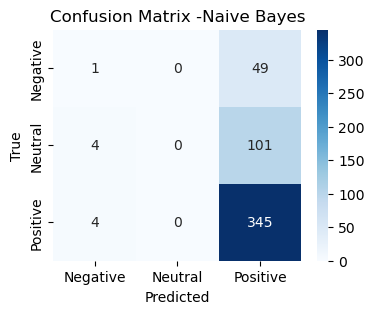

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
conf_matrix1 = confusion_matrix(y_new,predictions_nb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Naive Bayes')
plt.show()





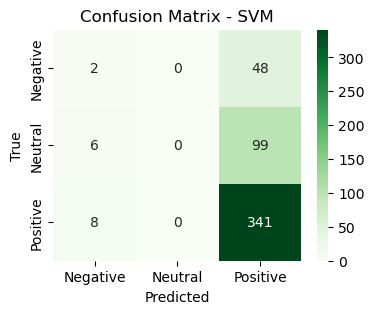

In [68]:
# Calculate the confusion matrix
conf_matrix2 = confusion_matrix(y_new,predictions_svm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()


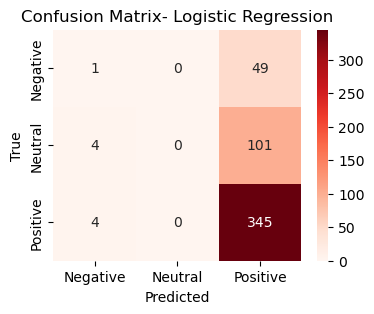

In [69]:
# Calculate the confusion matrix
conf_matrix3 = confusion_matrix(y_new,predictions_nb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix- Logistic Regression')
plt.show()


In [70]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(df2,'sentiment')

,Total,Percentage
positive,349,69.25
neutral,105,20.83
negative,50,9.92


In [71]:
df2.to_csv('new_data_with_predictions.csv', index=False)
